# Plotting Notebook

2018 November 29: Created by Michael Orella <br>
2019 November 11: Updated by Heather Mayes

**Note**: this will not run correctly, as required files are not present.

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from ligninkmc.kmc_common import (BONDS)
import os

colors = {0: (0, 0, 0), 1: (1, 0, 0), 2: (0, 0, 1), 3: (0, 0.6, 0), 4: (0.6, 0, 0.6), 5: (1, 0.549, 0),
          6: (0, 0.6, 0.6), 7: (1, 0.8, 0), 8: (0.6078, 0.298, 0), 9: (0.6, 0, 0), 10: (0, 0, 0.6)}
fontsize = 8
linewidth=1
singlecol = 3.3
doublecol = 7
height = 5


plot_dir_name = 'plots'
if not os.path.exists(plot_dir_name):
    os.makedirs(plot_dir_name)

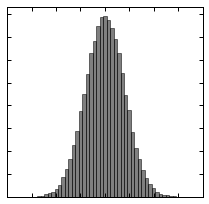

In [2]:
plt.figure(figsize=(3.5, 3.5))
x = np.random.normal(loc=0.4, scale=0.02, size=100000)
plt.hist(x,bins = 50, density=1, facecolor='black', alpha=0.5, edgecolor='black')
[plt.gca().spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left']]
plt.gca().tick_params(axis='both', which='major', labelsize=8, direction='in', pad=8, 
                      top=True, right=True, width=1, length=4)
plt.xlim([0.3, 0.5])
plt.gca().set_xticklabels([''] * len(plt.gca().get_xticklabels()))
plt.gca().set_yticklabels([''] * len(plt.gca().get_yticklabels()))
f_name = os.path.join(plot_dir_name, 'dist.svg')
plt.savefig(f_name, format='svg', transparent=True, bbox_inches='tight')

## Loading Cases
Load the analysis into memory so that we can easily plot it

### Making figure 5

In [3]:
sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('../results/sg_fast_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k] * k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(doublecol, height), 
                         gridspec_kw={'height_ratios': [1, 2]})

#Make plots of batch polymerization varying s/g
axes[0, 0].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', 
                    markersize=10, markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0, 0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i, 0].set_xscale('log') for i in range(2)]
[axes[i, 0].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.15], [0, 0.8]])]
[axes[i, 0].tick_params(axis='both', which='major', labelsize=fontsize, direction='in',
                        pad=8, top=True, right=True, width=linewidth, length = 4) for i in range(2)]
[axes[i, 0].tick_params(axis='both', which='minor', labelsize=fontsize, direction='in', pad=8, 
                        top=True, right=True, width=linewidth/2, length = 2) for i in range(2)]
[axes[j, 0].spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]


axes[1, 0].set_ylabel('Bond Content', fontsize=fontsize)
axes[1, 0].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 0].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 0].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 0].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 0].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 0].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 0].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])


axes[1, 0].set_xlabel('S/G Ratio', fontsize=fontsize)

rates = np.logspace(-5, 5, 21)

with open('../results/additionrate_analysis_results.pick', 'rb') as file:
          analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of s/g=1 varying addition rate
axes[0, 1].errorbar(rates, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')

[axes[i, 1].set_xscale('log') for i in range(2)]
[axes[i, 1].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.5], [0, 0.6]])]
[axes[i, 1].tick_params(axis='both', which='major', labelsize=fontsize, direction='in', pad=8, 
                        top=True, right=True, width=linewidth, length = 4) for i in range(2)]
[axes[i, 1].tick_params(axis='both', which='minor', labelsize=fontsize, direction='in', pad=8, 
                        top=True, right=True, width=linewidth/2, length = 2) for i in range(2)]
[axes[j, 1].spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]


axes[1, 1].errorbar(rates, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 1].errorbar(rates, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 1].errorbar(rates, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 1].errorbar(rates, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 1].errorbar(rates, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 1].errorbar(rates, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 1].errorbar(rates, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])


axes[1, 1].set_xlabel('Addition Rate [a.u.]', fontsize=fontsize)

sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('../results/sg_slow_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of batch polymerization varying s/g
axes[0, 2].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')


[axes[i, 2].set_xscale('log') for i in range(2)]
[axes[i, 2].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 1], [0, 1]])]
[axes[i, 2].tick_params(axis='both', which='major', labelsize=fontsize, direction='in',
                        pad=8, top=True, right=True, width=linewidth, length = 4) for i in range(2)]
[axes[i, 2].tick_params(axis='both', which='minor', labelsize=fontsize, direction='in', pad=8, 
                        top=True, right=True, width=linewidth/2, length = 2) for i in range(2)]
[axes[j, 2].spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1, 2].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 2].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 2].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 2].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 2].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 2].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 2].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1, 2].legend(loc='best',edgecolor='black', fontsize=fontsize)

axes[1, 2].set_xlabel('S/G Ratio', fontsize=fontsize)

[axes[0,i].set_xticklabels([''] * len(axes[0, 0].get_xticklabels())) for i in range(3)]
[fig.text(*loc, msg, fontsize=fontsize, fontweight='bold') for loc,msg in zip([(0.32, 0.93), (0.63, 0.93), 
                                                                               (0.95, 0.93)], ['a.', 'b.', 'c.'])]

fig.tight_layout()

plt.savefig('../plots/figure5.svg',format='svg', transparent=True, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../results/sg_fast_analysis_results.pick'

### Making figure 6

In [ ]:
sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('./results/sg_slow_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 5, sharex=False, sharey=False, figsize=(doublecol, height),
                         gridspec_kw={'height_ratios': [1, 2]})
[axes[i,j].set_xscale('log') for i in range(2) for j in range(5)]
[axes[i,j].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 1], [0, 1]]) for j in range(5)]
[axes[i,j].tick_params(axis='both', which='major', labelsize=fontsize, direction='in', pad=8, 
                       top=True, right=True, width=linewidth, length = 4) for i in range(2) for j in range(5)]
[axes[i,j].tick_params(axis='both', which='minor', labelsize=fontsize, direction='in', pad=8, 
                       top=True, right=True, width=linewidth/2, length = 2) for i in range(2) for j in range(5)]
[axes[j,k].spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left'] for j in range(2) 
 for k in range(5)]

#Make plots of batch polymerization varying s/g
axes[0,4].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0, 0].set_ylabel('Monomer Yield', fontsize=fontsize)

axes[1, 0].set_ylabel('Bond Content', fontsize=fontsize)
axes[1,4].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1,4].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1,4].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1,4].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1,4].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1,4].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1,4].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])

axes[1,4].set_xlabel('S/G Ratio', fontsize=fontsize)

sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('./results/sg_addrate1e-2_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of s/g=1 varying addition rate
axes[0,3].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')

axes[1,3].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1,3].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1,3].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1,3].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1,3].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1,3].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1,3].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                   markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])


axes[1,3].set_xlabel('S/G Ratio', fontsize=fontsize)

sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('./results/sg_addrate1e0_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
         for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of batch polymerization varying s/g
axes[0, 2].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')

axes[1, 2].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 2].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 2].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 2].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 2].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 2].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 2].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])


axes[1, 2].set_xlabel('S/G Ratio', fontsize=fontsize)

with open('./results/sg_addrate1e2_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of batch polymerization varying s/g
axes[0, 1].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')

axes[1, 1].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 1].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 1].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 1].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 1].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 1].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 1].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])

axes[1, 1].set_xlabel('S/G Ratio', fontsize=fontsize)

with open('./results/sg_fast_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

#Make plots of batch polymerization varying s/g
axes[0, 0].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')

axes[1, 0].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1, 0].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1, 0].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1, 0].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1, 0].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1, 0].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1, 0].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                    markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])

axes[1, 0].set_xlabel('S/G Ratio', fontsize=fontsize)

[axes[0,i].set_xticklabels([''] * len(axes[0, 0].get_xticklabels())) for i in range(5)]
[axes[j,i].set_yticklabels([''] * len(axes[0, 0].get_yticklabels())) for i in range(1,5) for j in range(2)]
[fig.text(*loc, msg, fontsize=fontsize, fontweight='bold') for loc, msg in zip([(0.1, 0.98), (0.28, 0.98), 
                                                                                (0.46, 0.98), (0.64, 0.98), 
                                                                                (0.82, 0.98)],
                                                                               ['a.', 'b.', 'c.', 'd.', 'e.'])]
[fig.text(*loc, msg, fontsize=fontsize, ha='center') for loc, msg in zip([(0.17, 0.98), (0.35, 0.98), (0.53, 0.98), 
                                                                          (0.71, 0.98), (0.89, 0.98)],
                                                                          reversed(['$10^{-5}$ GHz', '$10^{-2}$ GHz', 
                                                                                    '$10^{0}$ GHz', '$10^{2}$ GHz', 
                                                                                    '$10^{5}$ GHz']))]
axes[1,3].legend(loc='best', edgecolor='black', fontsize=fontsize)
fig.tight_layout()


#Fill areas on axes that match what people have observed
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.5, 0.5, 0.62, 0.62], facecolor=colors[0],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.02, 0.02, 0.12, 0.12], facecolor=colors[1],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.03, 0.03, 0.11, 0.11], facecolor=colors[2],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.01, 0.01, 0.07, 0.07], facecolor=colors[3],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.02, 0.02, 0.05, 0.05], facecolor=colors[4],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0, 0, 0.08, 0.08], facecolor=colors[5],alpha=0.3)
#axes[1, 0].fill([0.1, 10, 10, 0.1], [0.01, 0.01, 0.18, 0.18], facecolor=colors[6],alpha=0.3)

#axes[0, 0].plot([3, 1.11], [x/100 for x in [50, 52]],'r.')  # Birch
#axes[0, 0].plot([1.5, 1.05, 1.78], [x/100 for x in [44, 40, 38.4]], 'b.')  # Wild poplar
#axes[0, 0].plot([0.05, 0], [x/100 for x in [21, 19]], 'g.')  # Softwood
#axes[0, 0].plot([58, 2.7, 4.56, 0.51], [x/100 for x in [78, 36, 42.8, 32.5]], 'c.')  # GM Poplar

plt.savefig('../output/plots/figure5.svg',format='svg', transparent=True, bbox_inches='tight')

### Addition rate at an S/G ratio of 1

In [ ]:
rates = np.logspace(-5, 5, 21)

with open('../results/additionrate_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(singlecol, height), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(rates, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.5], [0, 0.6]])]
[axes[i].tick_params(axis='both', which='major', labelsize=fontsize, direction='in', pad=8, 
                     top=True, right=True, width=linewidth, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=fontsize, direction='in', pad=8, 
                     top=True, right=True, width=linewidth/2, length = 2) for i in range(2)]
[axes[j].spines[i].set_linewidth(linewidth) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(rates, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(rates, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(rates, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(rates, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(rates, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(rates, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(rates, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('Addition Rate [a.u.]', fontsize=fontsize)

plt.savefig('../plots/additionrates.svg',format='svg', transparent=True, bbox_inches='tight')

### Addition Rate at S/G of 4

In [ ]:
rates = np.logspace(-5, 5, 21)

with open('../results/addrate_sg4_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(singlecol, height), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(rates, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 1], [0, 1]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in', pad=8, 
                     top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in', pad=8, 
                     top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(rates, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(rates, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(rates, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(rates, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(rates, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(rates, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(rates, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('Addition Rate [a.u.]', fontsize=fontsize)

plt.savefig('../plots/additionratessg4.svg',format='svg', transparent=True, bbox_inches='tight')

### Addition Rates at S/G 0.25

In [ ]:
rates = np.logspace(-5, 5, 21)

with open('../results/addrate_sg0, 25_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(rates, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.5], [0, 0.6]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in', pad=8, 
                     top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in', pad=8, 
                     top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(rates, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(rates, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(rates, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(rates, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(rates, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(rates, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(rates, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('Addition Rate [a.u.]', fontsize=fontsize)

plt.savefig('../plots/additionratessg0, 25.svg',format='svg', transparent=True, bbox_inches='tight')

### S/G ratio variations at slow addition rate

In [ ]:
sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('../results/sg_slow_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3)
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 1], [0, 1]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('S:G ratio', fontsize=fontsize)

plt.savefig('../plots/sg_slow.svg',format='svg', transparent=True, bbox_inches='tight')

### S:G At Fast Addition Rate

In [ ]:
sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('../results/sg_fast_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor = 'black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.15], [0, 1]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('S:G ratio', fontsize=fontsize)
plt.savefig('../plots/sg_fast.svg',format='svg', transparent=True, bbox_inches='tight')

### S/G at a middle addition rate

In [ ]:
sg_opts = [0.1, 0.2, 0.25, 0.33, 0.5, 1, 2, 3, 4, 5, 10]

with open('../results/sg_addrate1e2_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
         for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                  for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                 for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(sg_opts, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor = 'black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.5], [0, 1]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(sg_opts, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(sg_opts, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(sg_opts, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(sg_opts, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(sg_opts, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(sg_opts, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(sg_opts, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('S:G ratio', fontsize=fontsize)
plt.savefig('../plots/sg_add1e2.svg',format='svg', transparent=True, bbox_inches='tight')

### Number of Monomers sensitivity slow addition

In [ ]:
nmax = [50, 100, 200,300,500,750, 1000, 2000]

with open('../results/nmax_slow_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(nmax, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0.4, 0.6], [0, 1]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in',
               pad=8, top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(nmax, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(nmax, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(nmax, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(nmax, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(nmax, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(nmax, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(nmax, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('Number of Monomers', fontsize=fontsize)

### Number of Monomers sensitivity fast addition

In [ ]:
nmax = [50, 100, 200,300,400,500]

with open('../results/nmax_fast_analysis_results.pick', 'rb') as file:
    analysis = pickle.load(file)
    
num_opts = len(analysis)
num_repeats = len(analysis[0])

num_monos = [[sum([analysis[j][i]['Chain Lengths'][k]*k for k in analysis[j][i]['Chain Lengths']]) 
              for i in range(num_repeats)] for j in range(num_opts)]

monomer_yields = [[analysis[j][i]['RCF Yields'][1]/num_monos[j][i] 
                   for i in range(num_repeats)] for j in range(num_opts)]
betaO4_content = [[analysis[j][i][BONDS]['bo4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
beta5_content = [[analysis[j][i][BONDS]['b5']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
betabeta_content = [[analysis[j][i][BONDS]['bb']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]
beta1_content = [[analysis[j][i][BONDS]['b1']/sum(analysis[j][i][BONDS].values())
                  for i in range(num_repeats)] for j in range(num_opts)]
fiveO4_content = [[analysis[j][i][BONDS]['5o4']/sum(analysis[j][i][BONDS].values())
                   for i in range(num_repeats)] for j in range(num_opts)]
alphaO4_content = [[analysis[j][i][BONDS]['ao4']/sum(analysis[j][i][BONDS].values())
                    for i in range(num_repeats)] for j in range(num_opts)]
fivefive_content = [[analysis[j][i][BONDS]['55']/sum(analysis[j][i][BONDS].values())
                     for i in range(num_repeats)] for j in range(num_opts)]

av_mon_yield = [np.mean(percent) for percent in monomer_yields]
std_mon_yield = [np.sqrt(np.var(percent)) for percent in monomer_yields]
av_bo4_content = [np.mean(percent) for percent in betaO4_content]
std_bo4_content = [np.sqrt(np.var(percent)) for percent in betaO4_content]
av_b5_content = [np.mean(percent) for percent in beta5_content]
std_b5_content = [np.sqrt(np.var(percent)) for percent in beta5_content]
av_bb_content = [np.mean(percent) for percent in betabeta_content]
std_bb_content = [np.sqrt(np.var(percent)) for percent in betabeta_content]
av_b1_content = [np.mean(percent) for percent in beta1_content]
std_b1_content = [np.sqrt(np.var(percent)) for percent in beta1_content]
av_5o4_content = [np.mean(percent) for percent in fiveO4_content]
std_5o4_content = [np.sqrt(np.var(percent)) for percent in fiveO4_content]
av_ao4_content = [np.mean(percent) for percent in alphaO4_content]
std_ao4_content = [np.sqrt(np.var(percent)) for percent in alphaO4_content]
av_55_content = [np.mean(percent) for percent in fivefive_content]
std_55_content = [np.sqrt(np.var(percent)) for percent in fivefive_content]

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(3.5,5), gridspec_kw={'height_ratios': [1, 2]})

axes[0].errorbar(nmax, av_mon_yield, yerr=std_mon_yield, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor='black', markeredgecolor='black', capsize=3, ecolor='black')
axes[0].set_xscale('log')
axes[0].set_ylabel('Monomer Yield', fontsize=fontsize)

[axes[i].set_ylim(ylims) for i, ylims in zip(range(2), [[0, 0.2], [0, 0.5]])]
[axes[i].tick_params(axis='both', which='major', labelsize=10, direction='in',
                     pad=8, top=True, right=True, width=1.5, length = 4) for i in range(2)]
[axes[i].tick_params(axis='both', which='minor', labelsize=10, direction='in',
                     pad=8, top=True, right=True, width=1, length=2) for i in range(2)]
[axes[j].spines[i].set_linewidth(1.5) for i in ['top', 'right', 'bottom', 'left'] for j in range(2)]

axes[1].set_ylabel('Bond Content', fontsize=fontsize)
axes[1].errorbar(nmax, av_bo4_content, yerr=std_bo4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[0], markeredgecolor=colors[0], label='bo4', capsize=3, ecolor=colors[0])
axes[1].errorbar(nmax, av_bb_content, yerr=std_bb_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[1], markeredgecolor=colors[1], label='bb', capsize=3, ecolor=colors[1])
axes[1].errorbar(nmax, av_b5_content, yerr=std_b5_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[2], markeredgecolor=colors[2], label='b5', capsize=3, ecolor=colors[2])
axes[1].errorbar(nmax, av_b1_content, yerr=std_b1_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[3], markeredgecolor=colors[3], label='b1', capsize=3, ecolor=colors[3])
axes[1].errorbar(nmax, av_5o4_content, yerr=std_5o4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[4], markeredgecolor=colors[4], label='5o4', capsize=3, ecolor=colors[4])
axes[1].errorbar(nmax, av_ao4_content, yerr=std_ao4_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[5], markeredgecolor=colors[5], label='ao4', capsize=3, ecolor=colors[5])
axes[1].errorbar(nmax, av_55_content, yerr=std_55_content, linestyle='none', marker='.', markersize=10, 
                 markerfacecolor=colors[6], markeredgecolor=colors[6], label='55', capsize=3, ecolor=colors[6])
axes[1].legend(loc='upper right',edgecolor='black', fontsize=fontsize)

axes[1].set_xlabel('Number of Monomers', fontsize=fontsize)

plt.savefig('../plots/nmax_fast.svg',format='svg', transparent=True, bbox_inches='tight')